<h1 center>ĐỌC DỮ LIỆU</h1>

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, IsolationForest
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [2]:
df = pd.read_csv('winequality-red.csv')
df.head(20)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
5,7.4,0.660,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5
6,7.9,0.600,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4,5
7,7.3,0.650,0.00,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0,7
8,7.8,0.580,0.02,2.0,0.073,9.0,18.0,0.9968,3.36,0.57,9.5,7
9,7.5,0.500,0.36,6.1,0.071,17.0,102.0,0.9978,3.35,0.80,10.5,5


In [3]:
# kiểm tra các giá trị null trong DataFrame (khuyết thiếuthiếu)
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [4]:
# mô tả thống kê của DataFrame
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


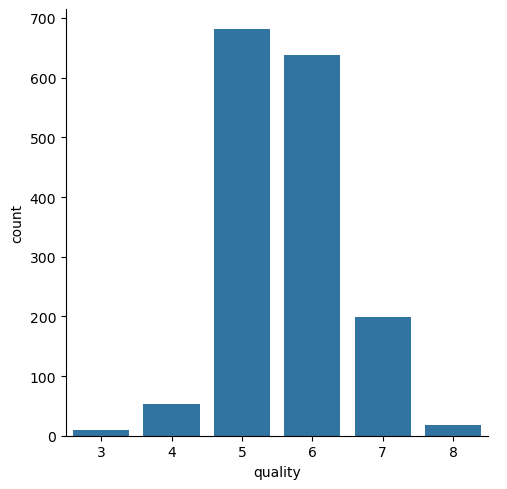

In [5]:
# số lượng các loại rượu vang theo chất lượng
sns.catplot(x='quality', data = df, kind = 'count')

<Axes: xlabel='quality', ylabel='volatile acidity'>

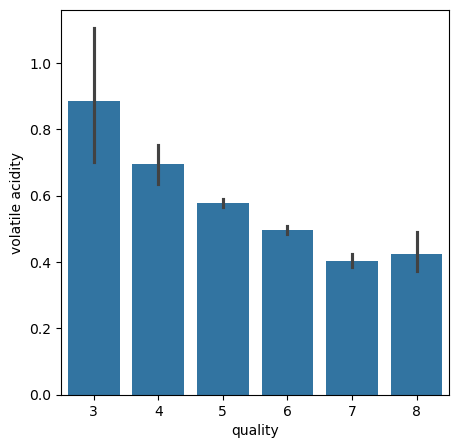

In [6]:
# độ axit dễ bay hơi so với chất lượng
plot = plt.figure(figsize=(5,5))
sns.barplot(x='quality', y = 'volatile acidity', data = df)

<Axes: xlabel='quality', ylabel='citric acid'>

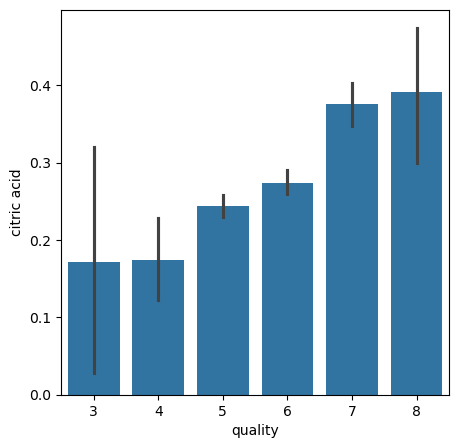

In [7]:
# axit citric so với chất lượng
plot = plt.figure(figsize=(5,5))
sns.barplot(x='quality', y = 'citric acid', data = df)

In [8]:
correlation = df.corr()

<Axes: >

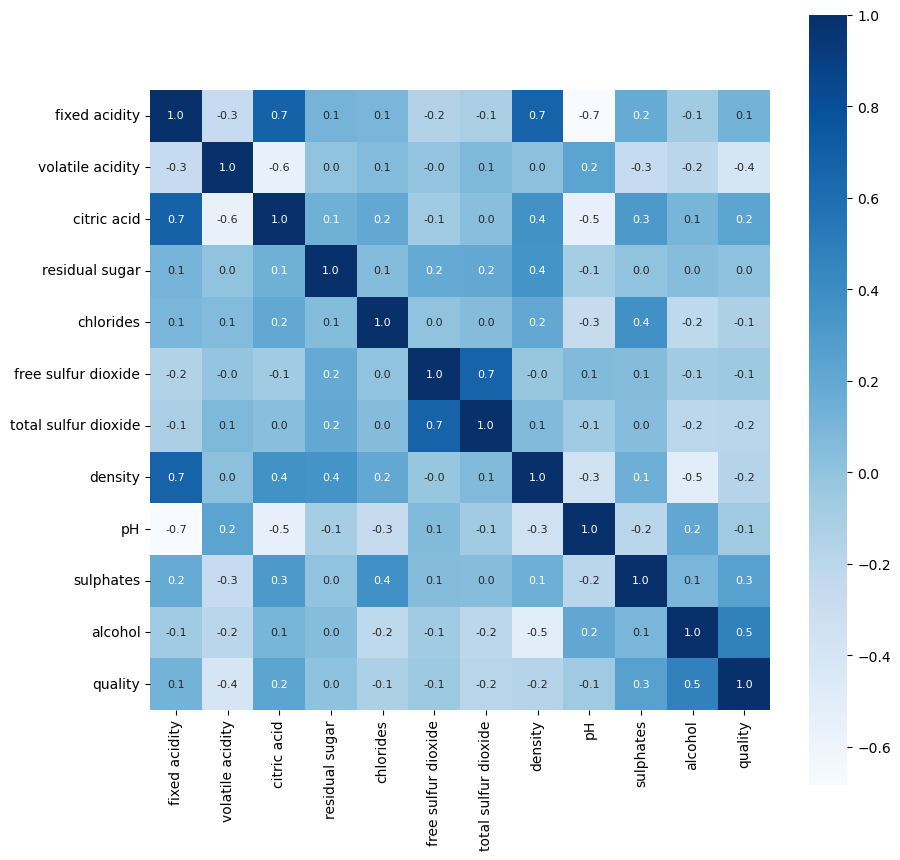

In [9]:
# vẽ biểu đồ nhiệt để hiểu rõ hơn về mối tương quan giữa các biến
plt.figure(figsize=(10,10))
sns.heatmap(correlation, cbar=True, square=True, fmt = '.1f', annot = True, annot_kws={'size':8}, cmap = 'Blues')

<h1>TIỀN XỬ LÝ DỮ LIỆU</h1>

In [10]:
# tách dữ liệu và Nhãn
X = df.drop("quality", axis=1)
y = df["quality"]

In [11]:
X

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4
...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2


In [12]:
# Khởi tạo và huấn luyện Isolation Forest
iso = IsolationForest(contamination=0.05, random_state=42)
yhat = iso.fit_predict(X)

# Xác định các dòng bị coi là ngoại lai
outliers = (yhat == -1)
n_outliers = outliers.sum()

# In ra số lượng dòng ngoại lai
print(f"Số lượng dòng ngoại lai bị loại bỏ: {n_outliers}")
print("Các dòng bị loại là:")
display(df[outliers])  # Hoặc dùng df[outliers].head() nếu quá nhiều dòng

# Lọc bỏ các dòng ngoại lai
mask = ~outliers  # giữ lại các dòng không phải ngoại lai
X_filtered = X[mask]
y_filtered = y[mask]

Số lượng dòng ngoại lai bị loại bỏ: 80
Các dòng bị loại là:


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
14,8.9,0.620,0.18,3.8,0.176,52.0,145.0,0.99860,3.16,0.88,9.200000,5
15,8.9,0.620,0.19,3.9,0.170,51.0,148.0,0.99860,3.17,0.93,9.200000,5
19,7.9,0.320,0.51,1.8,0.341,17.0,56.0,0.99690,3.04,1.08,9.200000,6
33,6.9,0.605,0.12,10.7,0.073,40.0,83.0,0.99930,3.45,0.52,9.400000,6
81,7.8,0.430,0.70,1.9,0.464,22.0,67.0,0.99740,3.13,1.28,9.400000,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1475,5.3,0.470,0.11,2.2,0.048,16.0,89.0,0.99182,3.54,0.88,13.566667,7
1476,9.9,0.500,0.50,13.8,0.205,48.0,82.0,1.00242,3.16,0.75,8.800000,5
1477,5.3,0.470,0.11,2.2,0.048,16.0,89.0,0.99182,3.54,0.88,13.600000,7
1558,6.9,0.630,0.33,6.7,0.235,66.0,115.0,0.99787,3.22,0.56,9.500000,5


In [13]:
#Theo gợi ý trong mô tả tập dữ liệu: nhị phân hóa nhãn để xác định và giải quyết vấn đề phân loại
# Nhị phân hóa nhãn: 0 nếu quality < 7, 1 nếu quality >= 7
y_filtered_binary = (y_filtered >= 7).astype(int)

In [14]:
y_filtered_binary

0       0
1       0
2       0
3       0
4       0
       ..
1594    0
1595    0
1596    0
1597    0
1598    0
Name: quality, Length: 1519, dtype: int32

<h1>XÂY DỰNG MÔ HÌNH</h1>

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X_filtered, y_filtered_binary, test_size=0.2, random_state=42)

In [16]:
# mô hình với các siêu tham số mặc định. Chỉ điều chỉnh nếu nó không hoạt động tốt.
random_forest = RandomForestClassifier()
random_forest.fit(X_train, y_train)

RandomForestClassifier()

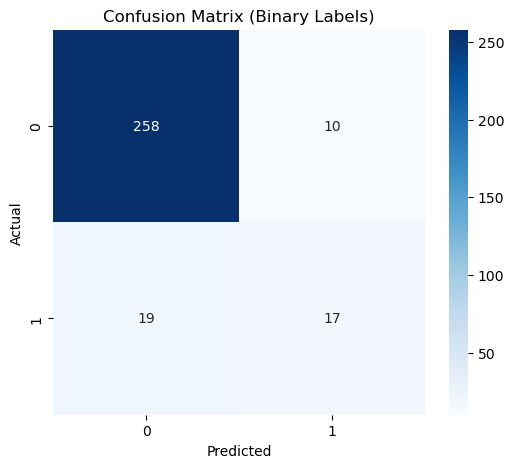

In [17]:
# Dự đoán nhãn trên tập kiểm tra
y_pred = random_forest.predict(X_test)

# Ma trận nhầm lẫn
conf_matrix = confusion_matrix(y_test, y_pred)

# Vẽ ma trận nhầm lẫn nhị phân
plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues",
            xticklabels=[0, 1], yticklabels=[0, 1])
plt.title("Confusion Matrix (Binary Labels)")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

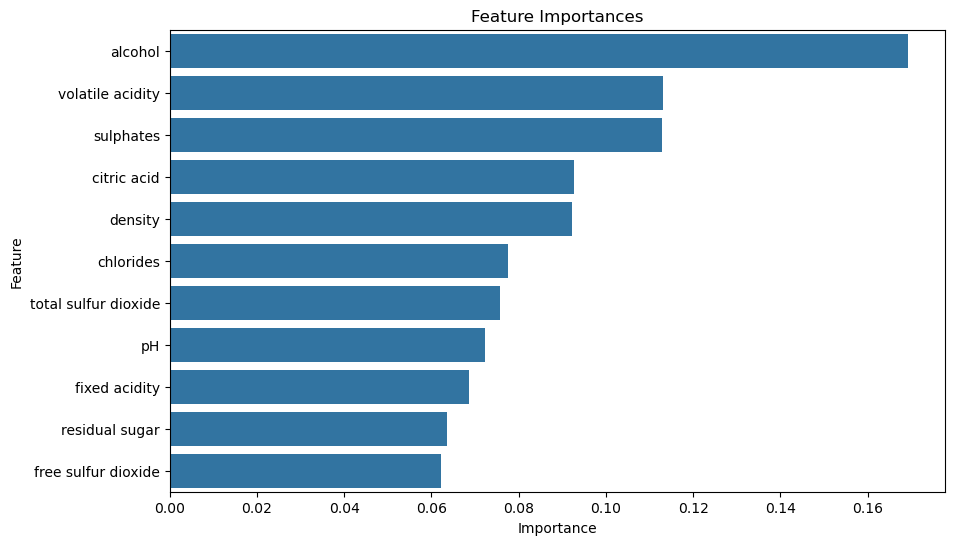

In [18]:
feature_importances = pd.Series(random_forest.feature_importances_, index=X.columns)
feature_importances = feature_importances.sort_values(ascending=False)

plt.figure(figsize=(10,6))
sns.barplot(x=feature_importances.values, y=feature_importances.index)
plt.title("Feature Importances")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.show()

<h1>ĐÁNH GIÁ MÔ HÌNH ĐÃ HUẤN LUYỆN</h1>

In [19]:
# độ chính xác trên dữ liệu kiểm tra
y_pred = random_forest.predict(X_test)
report = classification_report(y_pred, y_test)

In [20]:
print(report)

              precision    recall  f1-score   support

           0       0.96      0.93      0.95       277
           1       0.47      0.63      0.54        27

    accuracy                           0.90       304
   macro avg       0.72      0.78      0.74       304
weighted avg       0.92      0.90      0.91       304



<h1>KIỂM TRA MÔ HÌNH VỚI GIÁ TRỊ ĐƯỢC TẠO NGẪU NHIÊN </h1>

In [21]:
input = (7.7,0.6,0.42,7.1,0.08,14.0,111.0,0.99,3.7,0.75,11.2)

input_as_np_array = np.asarray(input)

# định hình lại dữ liệu vì chúng ta đang cố gắng xác định chất lượng chỉ cho một quan sát
input_as_np_array = input_as_np_array.reshape(1,-1)

output = random_forest.predict(input_as_np_array)
print(output)

if (output[0] == 1):
  print('Quality wine')
else:
  print('Poor quality wine')

[0]
Poor quality wine


c:\Users\Hi\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [22]:
import joblib
joblib.dump(random_forest, 'random_forest_model.pkl')


['random_forest_model.pkl']